In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
%matplotlib inline

In [5]:
train = pd.read_csv('data/train.csv', na_values=['null', 'Na'])

In [13]:
33579/len(train)

0.012447094565891869

In [12]:
len(train.loc[train.click==1])

2034

In [6]:
train.loc[0]

click                                            0
weekday                                          1
hour                                            14
bidid             fdfae6789b787899f1b875de3ab8b21a
logtype                                          1
userid                           u_Vh1OPkFv3q5CFdR
useragent                               windows_ie
IP                                   180.107.112.*
region                                          80
city                                            85
adexchange                                       2
domain                        trqRTuToMTNUjM9r5rMi
url               d48a96ab59d7ad741a48e781de44efeb
urlid                                         null
slotid                                   433287550
slotwidth                                      468
slotheight                                      60
slotvisibility                                   1
slotformat                                       0
slotprice                      

In [8]:
len(train.loc[train.click==1])

1986

In [9]:
len(train)

2664159

In [11]:
train.payprice.sum()/1986

104830.46928499496

In [7]:
print('Number of rows dropped: {}'.format(len(train.loc[train.bidprice<train.payprice].index)))
train.drop(train.loc[train.bidprice<train.payprice].index, inplace=True)

Number of rows dropped: 33579


In [45]:
train.reset_index(inplace=True, drop=True)

In [46]:
train.drop(['logtype', 'urlid'], axis=1, inplace=True)

In [47]:
missing = []
for col in train.columns:
    if len(train.loc[train[col].isnull()])>0:
        missing.append(col)

In [48]:
missing

['adexchange', 'domain', 'url', 'keypage', 'usertag']

In [55]:
train.loc[train.domain.isnull()]

,click,weekday,hour,bidid,userid,useragent,IP,region,city,adexchange,...,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag,os,browser
22,0,3,14,92f3d847d97ef3b6f0e18769a1b2ccfb,u_DAOEZMByt60,android_safari,60.210.7.*,146,149,NaN,...,Na,6,11908,277,117,NaN,2997,NaN,android,safari
29,0,5,21,7871a24533b7c45b880cb47cb1b32d69,u_DANDmw2btq6,android_safari,117.79.232.*,1,1,NaN,...,Na,20,12987,277,30,NaN,2997,NaN,android,safari
54,0,3,15,da93f4e3eb4ab48f4e39c0390fdabc32,u_DAOFq3EVyFv,android_safari,117.136.24.*,201,202,NaN,...,Na,8,11908,277,21,NaN,2997,NaN,android,safari
63,0,4,16,31c769bddece301fa7da67c9fd3a4872,u_DAPFad74x8r,android_safari,113.240.249.*,201,202,NaN,...,Na,24,12782,277,24,NaN,2997,NaN,android,safari
160,0,5,11,4c3cae4b96c146d80b7d760205f90570,u_DAQBKsCCy5C,android_safari,14.18.203.*,216,216,NaN,...,Na,6,12987,277,6,NaN,2997,NaN,android,safari
164,0,4,20,ffce8b0499edb16a58748523533cd949,u_DAPKjK90xYP,android_safari,114.83.161.*,79,79,NaN,...,Na,6,12782,277,30,NaN,2997,NaN,android,safari
181,0,0,21,9f74dd2e993bf1409655e6e89ce29977,u_Vh27Pud8LQsvJbE,windows_ie,119.4.57.*,276,277,2.0,...,0,5,2abc9eaf57d17a96195af3f63c45dc72,300,151,bebefa5efe83beee17a3d245e7c5085b,1458,NaN,windows,ie
187,0,4,8,f3aeec3c3f2e3057f988694cd2dc85ac,u_Vh5_Vru4PZnh3hE,windows_ie,202.104.114.*,216,219,2.0,...,0,5,449a22cd91d9042eda3d3a1b89a22ea8,238,11,0f951a030abdaedd733ee8d114ce2944,3427,"10048,10684,10063,10006,11092,10111",windows,ie
205,0,3,14,7f5236cf73a6fe8f041f6a934f9eec03,u_DAOEm0Adx0b,android_safari,220.184.84.*,94,95,NaN,...,Na,51,11908,277,51,NaN,2997,NaN,android,safari
228,0,3,15,62626eb933136f9cdc2c15d268a343f7,u_DAOFA17yw~T,android_safari,113.106.102.*,216,220,NaN,...,Na,6,11908,277,34,NaN,2997,NaN,android,safari


In [63]:
train.payprice.sum()/len(train.loc[train.click==1])

106438.66224188791

## OS & Browser Usage

In [65]:
train["os"],train["browser"] = zip(*train.useragent.map(lambda x: x.split("_")))

In [66]:
for name in train.os.unique():
    print(name + ': ' + str(train.os.value_counts()[name]*100/len(train)) + '%')

windows: 95.251317956%
android: 2.62345713335%
mac: 1.96979840148%
other: 0.0748404774667%
linux: 0.0633864370817%
ios: 0.0171995946233%


In [67]:
os_ctr = []
for name in train.os.unique():
    os_ctr.append(len(train.loc[(train.click==1) & (train.os==name)])*100/len(train.loc[train.os==name]))

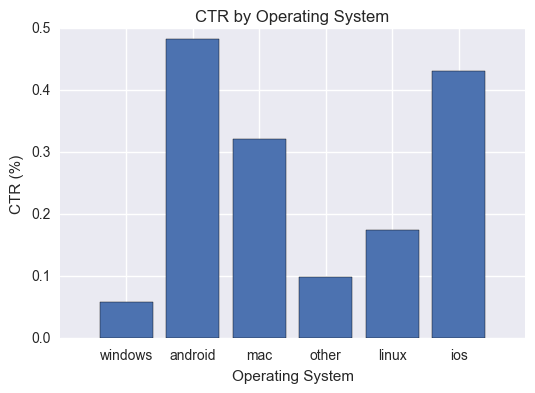

In [77]:
plt.bar(np.arange(len(train.os.unique())), os_ctr, tick_label=train.os.unique().tolist(), align='center')
plt.title('CTR by Operating System')
plt.ylabel('CTR (%)')
plt.xlabel('Operating System')
plt.show()

In [78]:
for name in train.browser.unique():
    print(name + ': ' + str(train.browser.value_counts()[name]*100/len(train)) + '%')

ie: 60.0388177058%
chrome: 32.9505682168%
safari: 4.13286983391%
theworld: 0.567327145927%
other: 0.926702296517%
firefox: 0.965549656787%
opera: 0.114985220952%
maxthon: 0.301956676297%
sogou: 0.0012232470314%


In [79]:
browser_ctr = []
for name in train.browser.unique():
    browser_ctr.append(len(train.loc[(train.click==1) & (train.browser==name)])*100/len(train.loc[train.browser==name]))

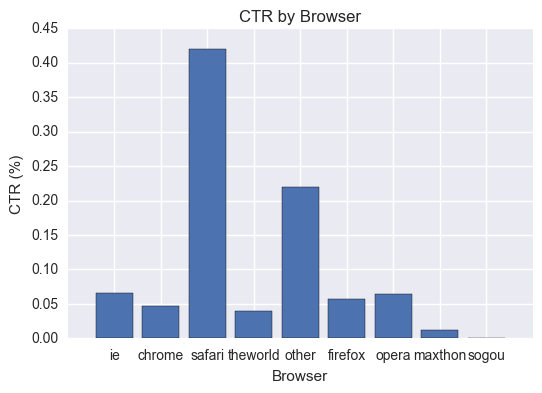

In [80]:
plt.bar(np.arange(len(train.browser.unique())), browser_ctr, tick_label=train.browser.unique().tolist(), align='center')
plt.title('CTR by Browser')
plt.ylabel('CTR (%)')
plt.xlabel('Browser')
plt.show()

In [81]:
for name in train.useragent.unique():
    print(name + ': ' + str(train.useragent.value_counts()[name]*100/len(train)) + '%')

windows_ie: 60.0367418927%
windows_chrome: 32.8133421407%
android_safari: 2.51054772554%
mac_safari: 1.53495261586%
windows_theworld: 0.567327145927%
other_other: 0.0662777482469%
windows_firefox: 0.91821370348%
windows_other: 0.461905492676%
windows_opera: 0.0902237355889%
windows_maxthon: 0.299361909867%
android_chrome: 0.0189047268489%
mac_other: 0.322492399188%
windows_safari: 0.0640536627352%
linux_safari: 0.00493005621747%
android_other: 0.0725051876795%
mac_chrome: 0.0785472866527%
other_safari: 0.00233528978722%
linux_chrome: 0.0392921773723%
mac_firefox: 0.0312854695304%
android_opera: 0.0186823182978%
linux_firefox: 0.0153461900303%
ios_safari: 0.0160504837757%
other_opera: 0.00467057957444%
other_ie: 0.0010379065721%
linux_other: 0.00237235787908%
mac_opera: 0.000667225653492%
ios_other: 0.00114911084768%
linux_ie: 0.000704293745353%
android_sogou: 0.00055602137791%
linux_opera: 0.000741361837213%
mac_sogou: 0.000518953286049%
android_ie: 0.000296544734885%
android_maxthon: 

# Hour & Weekday Analysis

In [87]:
week_ctr = []
for name in sorted(train.weekday.unique()):
    week_ctr.append(len(train.loc[(train.click==1) & (train.weekday==name)])*100/len(train.loc[train.weekday==name]))

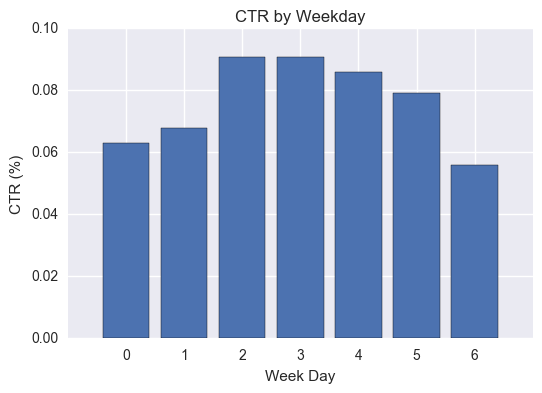

In [88]:
plt.bar(np.arange(len(train.weekday.unique())), week_ctr, tick_label=sorted(train.weekday.unique().tolist()), align='center')
plt.title('CTR by Weekday')
plt.ylabel('CTR (%)')
plt.xlabel('Week Day')
plt.show()

In [89]:
hour_ctr = []
for name in sorted(train.hour.unique()):
    hour_ctr.append(len(train.loc[(train.click==1) & (train.hour==name)])*100/len(train.loc[train.hour==name]))

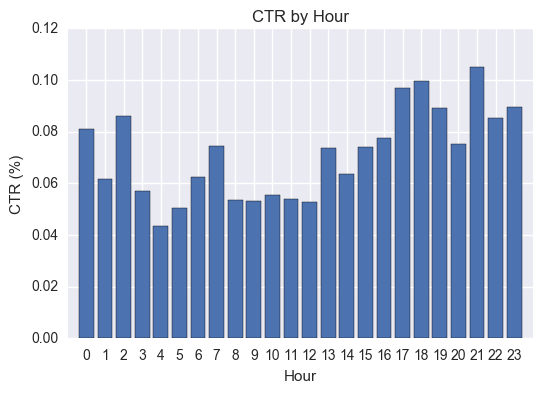

In [92]:
plt.bar(np.arange(1,25), hour_ctr, tick_label=sorted(train.hour.unique().tolist()), align='center')
plt.title('CTR by Hour')
plt.ylabel('CTR (%)')
plt.xlabel('Hour')
plt.show()

## Ad Shape Analysis

In [93]:
def create_slotdim(row):
    return str(row['slotwidth']) + 'x' + str(row['slotheight'])

In [94]:
train['slotdim'] = train.apply(create_slotdim, axis=1)

In [107]:
for name in train.slotdim.value_counts().index.tolist()[:20]:
    print(name + ': ' + str(train.slotdim.value_counts()[name]*100/len(train)) + '%')

300x250: 26.0293253088%
1000x90: 22.4980335377%
728x90: 15.2059985069%
336x280: 9.54818444193%
160x600: 4.81021507648%
250x250: 4.60359753245%
950x90: 4.46885501854%
960x90: 4.0942078141%
200x200: 2.44475186249%
320x50: 2.01972912121%
468x60: 1.94544466512%
120x600: 0.769496518935%
120x240: 0.315746006469%
980x90: 0.256251719033%
180x600: 0.233195365895%
620x60: 0.20917524237%
360x300: 0.159392795001%
300x100: 0.109499143356%
640x90: 0.109276734805%
910x90: 0.0641648670108%


In [108]:
slot_ctr = []
for name in train.slotdim.value_counts().index.tolist()[:20]:
    slot_ctr.append(len(train.loc[(train.click==1) & (train.slotdim==name)])*100/len(train.loc[train.slotdim==name]))

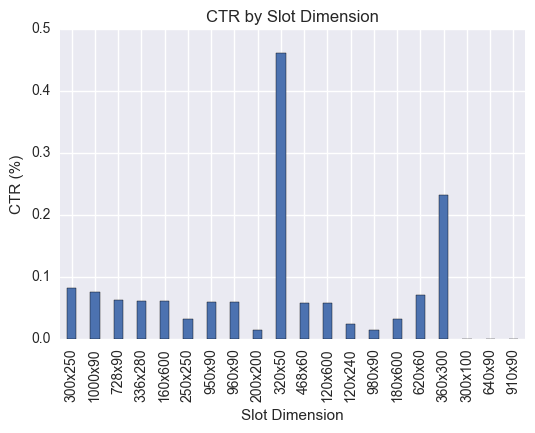

In [117]:
plt.bar(np.arange(1,41,2), slot_ctr, tick_label=train.slotdim.value_counts().index.tolist()[:20], align='center')
plt.xticks(rotation=90)
plt.title('CTR by Slot Dimension')
plt.ylabel('CTR (%)')
plt.xlabel('Slot Dimension')
plt.show()

## Click-Through Rates Analysis

In [ ]:
CTR = []
for adv in train.advertiser.unique():
    CTR.append(train.loc[train.advertiser==adv].click.mean()*100)
    
Imp = []
for adv in train.advertiser.unique():
    Imp.append(len(train.loc[train.advertiser==adv]))

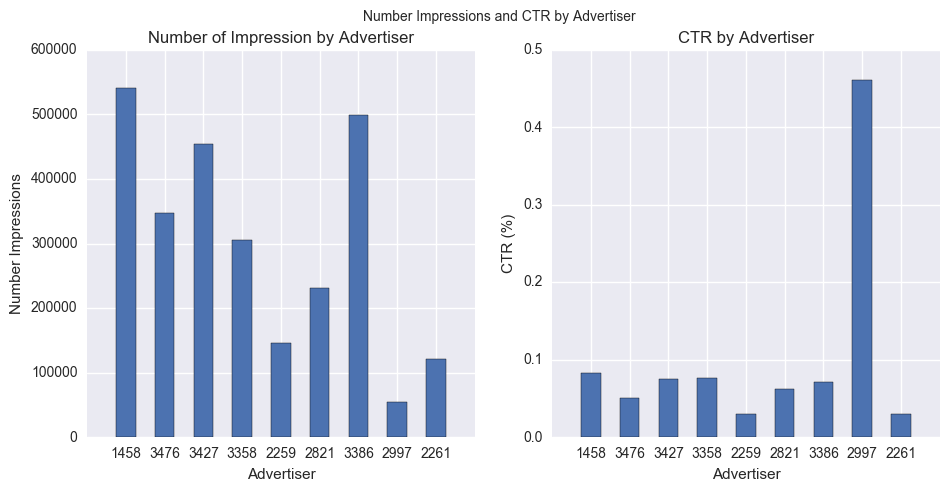

In [132]:
plt.figure(figsize=(11,5))
plt.subplot(121)    
plt.bar(np.arange(len(Imp)), width=0.5, height=Imp, align='center', tick_label=train.advertiser.unique().tolist())
plt.title('Number of Impression by Advertiser')
plt.ylabel('Number Impressions')
plt.xlabel('Advertiser')
plt.subplot(122)
plt.bar(np.arange(len(CTR)), width=0.5, height=CTR, align='center', tick_label=train.advertiser.unique().tolist())
plt.title('CTR by Advertiser')
plt.ylabel('CTR (%)')
plt.xlabel('Advertiser')

plt.suptitle('Number Impressions and CTR by Advertiser')
plt.show()

In [53]:
train.loc[train.userid==train.userid.unique()[4]]

,click,weekday,hour,bidid,logtype,userid,useragent,IP,region,city,...,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
4,0,6,9,657d317dc4045bb79c2652abbea07530,1,u_Vh1zOJuQOtTCBgL,windows_chrome,123.190.78.*,40,48,...,90,0,1,0,c938195f9e404b4f38c7e71bf50263e5,238,34,a3becb967c015e9acb5e72f22b100ef8,3476,"10031,13042,10006,10057,13866,10063,14273,1005..."


In [54]:
len(train.bidid.unique())

2697738

# Functions for each advertiser

In [80]:
train.loc[(train.advertiser==2997) & (train.click==1)]

,click,weekday,hour,bidid,logtype,userid,useragent,IP,region,city,...,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag,slotdim
45821,1,4,15,3dc9ae3485a4bbc376917ec19475ae8f,1,u_DAPFa6Bhtf~,android_safari,182.18.28.*,1,1,...,FirstView,Na,175,12782,277,209,null,2997,null,320x50
54074,1,2,17,5e805fc5fafbe2d1f7acdb24497ccffe,1,u_DANH91DzuJh,android_safari,119.100.98.*,183,185,...,FirstView,Na,6,11908,277,146,null,2997,null,320x50
54981,1,2,17,c043fa811ef45248c2a1e7eb2e6b76b1,1,u_DANHt2EZxth,android_other,113.7.80.*,65,75,...,FirstView,Na,176,11908,277,176,null,2997,null,320x50
70868,1,2,19,95e025ffea6a26d692b4f8eac5b2393a,1,u_DANIuB1Ht0G,android_safari,122.241.141.*,94,105,...,FirstView,Na,19,11908,277,19,null,2997,null,320x50
71607,1,2,17,02e0f8b75a68942b890c27e174494c43,1,u_DANHA65ZzWU,android_safari,122.227.8.*,94,101,...,FirstView,Na,6,11908,277,6,null,2997,null,320x50
82017,1,5,10,87562dc450eac76fbe463ea1734427bd,1,u_DAQA325yw0e,android_safari,113.194.131.*,134,135,...,FirstView,Na,76,12987,277,76,null,2997,null,320x50
84645,1,5,9,7587134dcfd99d1cb005bfdaaacca4b4,1,u_DAQ970BCtxB,android_safari,59.53.183.*,134,135,...,FirstView,Na,198,12987,277,198,null,2997,null,320x50
94751,1,4,20,35774f97af504f7a40b4d45a9840f259,1,u_DAPKP17gz5d,android_safari,182.85.219.*,134,135,...,FirstView,Na,6,12782,277,6,null,2997,null,320x50
102717,1,2,17,fa5e4ede3baad9f95da1c4bb30ace8e2,1,u_DANHH4CUso1,android_safari,122.240.172.*,94,97,...,FirstView,Na,128,11908,277,140,null,2997,null,320x50
150349,1,4,21,d54325879ce364a94e9dec9800194aa4,1,u_DAPLG073vtO,android_safari,36.62.18.*,106,106,...,FirstView,Na,99,12782,277,170,null,2997,null,320x50


In [111]:
## Need to find num Imps, num Clicks, Cost, avg CPM, eCPC

def calc_imps(df, adv):
    return len(df.loc[df.advertiser==adv])

def calc_clicks(df, adv):
    return len(df.loc[(df.advertiser==adv) & (df.click==1)])

def calc_cost(df, adv):
    return df.loc[df.advertiser==adv, 'payprice'].sum()

def calc_CPM(df, adv):
    return calc_cost(df, adv)*1000/len(df.loc[df.advertiser==adv])

def calc_CTR(df, adv):
    return df.loc[df.advertiser==adv].click.mean()*100

def calc_CPC(df, adv):
    return calc_cost(df, adv)/calc_clicks(df, adv)

In [113]:
from prettytable import PrettyTable

for adv in train.advertiser.unique():
    print('Advertiser: {:d} | Impressions: {:d} | Clicks: {:d} | CTR: {:.2f} | Cost: {:d} | CPM: {:.2f} | eCPC: {:.2f}'.format(adv,
                                                                                                          calc_imps(train, adv),
                                                                                                          calc_clicks(train, adv),
                                                                                                          calc_CTR(train, adv),
                                                                                                          calc_cost(train, adv),
                                                                                                          calc_CPM(train, adv),
                                                                                                          calc_CPC(train, adv)))

Advertiser: 1458 | Impressions: 540293 | Clicks: 451 | CTR: 0.08 | Cost: 37231239 | CPM: 68909.35 | eCPC: 82552.64
Advertiser: 3476 | Impressions: 342243 | Clicks: 173 | CTR: 0.05 | Cost: 26328601 | CPM: 76929.55 | eCPC: 152188.45
Advertiser: 3427 | Impressions: 439787 | Clicks: 323 | CTR: 0.07 | Cost: 33297891 | CPM: 75713.68 | eCPC: 103089.45
Advertiser: 3358 | Impressions: 289982 | Clicks: 204 | CTR: 0.07 | Cost: 24517382 | CPM: 84547.94 | eCPC: 120183.25
Advertiser: 2259 | Impressions: 146778 | Clicks: 45 | CTR: 0.03 | Cost: 13649026 | CPM: 92990.95 | eCPC: 303311.69
Advertiser: 2821 | Impressions: 231416 | Clicks: 144 | CTR: 0.06 | Cost: 20625766 | CPM: 89128.52 | eCPC: 143234.49
Advertiser: 3386 | Impressions: 498554 | Clicks: 358 | CTR: 0.07 | Cost: 38341028 | CPM: 76904.46 | eCPC: 107097.84
Advertiser: 2997 | Impressions: 54487 | Clicks: 251 | CTR: 0.46 | Cost: 3413227 | CPM: 62642.96 | eCPC: 13598.51
Advertiser: 2261 | Impressions: 120619 | Clicks: 37 | CTR: 0.03 | Cost: 10789

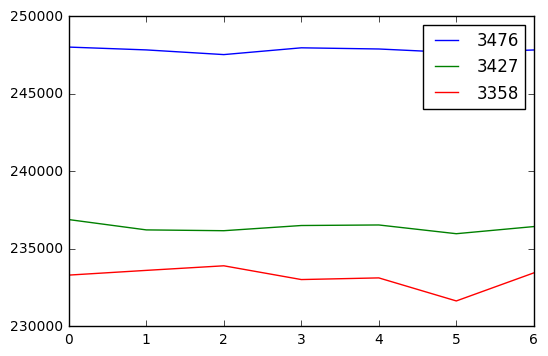

In [110]:
ad3476 = [train.loc[(train.advertiser==3476) & (train.weekday==x), 'bidprice'].sum()*1000/len(train.loc[(train.advertiser==3476) & (train.weekday==x)])
         for x in [0,1,2,3,4,5,6]]
ad3427 = [train.loc[(train.advertiser==3427) & (train.weekday==x), 'bidprice'].sum()*1000/len(train.loc[(train.advertiser==3427) & (train.weekday==x)])
         for x in [0,1,2,3,4,5,6]]
ad3358 = [train.loc[(train.advertiser==3358) & (train.weekday==x), 'bidprice'].sum()*1000/len(train.loc[(train.advertiser==3358) & (train.weekday==x)])
         for x in [0,1,2,3,4,5,6]]
plt.figure()
plt.plot([0,1,2,3,4,5,6], ad3476, label='3476')
plt.plot([0,1,2,3,4,5,6], ad3427, label='3427')
plt.plot([0,1,2,3,4,5,6], ad3358, label='3358')
plt.legend()
plt.show()